# Nipah Virus Inhibitor Discovery Pipeline
**Student:** Vihaan Agrawal  
**Project:** Computational Discovery of Resistance-Proof Antivirals

## Welcome
This notebook is the **Unified Control Center** for my research project. It allows you to:
1.  **Prepare the Data:** Download the virus structure and create the mutant from scratch.
2.  **Run the Simulation:** Test the drug candidates using the Vina physics engine.
3.  **Verify the Results:** Analyze the data and prove the resistance profile.

---

## Phase 0: Environment Setup (UV)
We use **uv** for fast, reliable dependency management. This cell ensures all libraries are installed.

In [1]:
import sys
import subprocess

print("Checking Dependencies via uv...")
subprocess.run(["uv", "pip", "install", "-r", "requirements.txt"], check=True)
print("Dependencies Verified.")

Checking Dependencies via uv...
Dependencies Verified.


Audited 9 packages in 47ms


## Phase 1: Data Preparation ("The Kitchen")
Before we can run any physics, we need to correct the raw biological data. This involves cleaning the PDB file and creating the W730A mutant.

In [2]:
import os
from pathlib import Path

# Define paths to our specialized background scripts
BASE_DIR = Path(".").resolve()
SCRIPTS_DIR = BASE_DIR / "scripts"
PIPELINE_SCRIPT = SCRIPTS_DIR / "pipeline.py"
SETUP_SCRIPT = SCRIPTS_DIR / "setup.py"
VERIFY_SCRIPT = SCRIPTS_DIR / "verify.py"

if not SCRIPTS_DIR.exists():
    print("Error: 'scripts/' folder missing! check directory.")
else:
    print("Environment Found. Ready to run.")

Environment Found. Ready to run.


### Step 1.1: Run the 'From Scratch' Build
This command runs `scripts/setup.py`, which:
1.  **Downloads** 9KNZ.cif from the Protein Data Bank.
2.  **Cleans** the water molecules.
3.  **Mutates** W730 to Alanine.
4.  **Converts** to PDBQT format.

In [3]:
print("Starting Building Process... (This might take a minute)")
subprocess.run(["python3", str(SETUP_SCRIPT)], check=True)
print("Build Complete. Data is in 'data/' folder.")

Starting Building Process... (This might take a minute)


*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'N ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'O ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PD

TATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2985)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'N ' (atom 2986)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2987)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2988)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the el

Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'O ' (atom 7161)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 7162)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 7163)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'S ' (atom 7164)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/Axiomatize/Documents/biomni-workflow-2/vanshaj_workflow/finalrelease/data/receptor_wt.pdb)



1 molecule converted
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'N ' (atom 1)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 3)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'O ' (atom 4)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.


umns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2326)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'O ' (atom 2327)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2328)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2329)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 2330)


Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'N ' (atom 6286)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 6287)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'C ' (atom 6288)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the PDB specification,
  columns 77-78 should contain the element symbol of an atom.
  but OpenBabel found 'O ' (atom 6289)
*** Open Babel Warning  in parseAtomRecord
  Problems reading a HETATM or ATOM record.
  According to the

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /Users/Axiomatize/Documents/biomni-workflow-2/vanshaj_workflow/finalrelease/data/receptor_mut.pdb)



Nipah Virus Pipeline: Full Setup

 Step 1: Checking Dependencies
Checking Python packages...
  Please run: uv pip install -r requirements.txt

Checking System Binaries...
  'obabel' found.

 Step 2: Preparing Directory Structure
  Verified directory: raw_data/
  Verified directory: data/

 Step 3: Downloading Raw Data (PDB: 9KNZ)
  Download complete.

 Step 4: Running Scientific Preparation Pipeline
  This imports our cleaning algorithm to:
  1. Strip water molecules & ions
  2. Fix missing atoms
  3. Calculate the W730A mutation structure
  4. Convert everything to physics-ready PDBQT format

  4a. Converting CIF -> PDB...
  4b. Cleaning Structure (Removing Noise)...
  4c. generating W730A Mutant in silico...
    Found W730. Mutating to ALA...
  4d. Converting to PDBQT (Physics Ready)...
  Done. Receptors are ready.

Setup Complete! You can now run 'pipeline.py' or 'verify.py'.
Build Complete. Data is in 'data/' folder.


1 molecule converted


---
## Phase 2: The Experiments ("The Lab")
Now that the receptors are ready, we run the verification experiment.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def run_pipeline(ligand_file):
    print(f"Processing {ligand_file}...")
    # Note: We invoke python3 directly, assuming we are inside the active venv/conda env
    result = subprocess.run(
        ["python3", str(PIPELINE_SCRIPT), str(ligand_file)], 
        capture_output=True, 
        text=True
    )
    print(result.stdout)
    return result.stdout

### Step 2.1: Test the Lead Candidate (BMS-986205)

In [5]:
bms_output = run_pipeline("data/ligand_BMS_986205.pdbqt")

Processing data/ligand_BMS_986205.pdbqt...



Analyzing Candidate: ligand_BMS_986205.pdbqt
--------------------------------------------------
  1. Docking into Wild-Type (9KNZ)... Done. (Affinity: -7.501 kcal/mol)
  2. Docking into Mutant (W730A)...   Done. (Affinity: -7.501 kcal/mol)
--------------------------------------------------
  > Resistance Delta (Mutant - WT): +0.00 kcal/mol
  > Dist to Ghost Sidechain: 2.38 Å [SAFE]
--------------------------------------------------
  VERDICT: ACCEPTED (Potent & Resilient Candidate!)
  Recommendation: Proceed to In-Vitro Validation.



### Step 2.2: Test the Control (ERDRP-0519)

In [6]:
erdrp_output = run_pipeline("data/ligand_ERDRP_0519.pdbqt")

Processing data/ligand_ERDRP_0519.pdbqt...



Analyzing Candidate: ligand_ERDRP_0519.pdbqt
--------------------------------------------------
  1. Docking into Wild-Type (9KNZ)... Done. (Affinity: -6.694 kcal/mol)
  2. Docking into Mutant (W730A)...   Done. (Affinity: -6.53 kcal/mol)
--------------------------------------------------
  > Resistance Delta (Mutant - WT): +0.16 kcal/mol
  > Dist to Ghost Sidechain: 2.93 Å [SAFE]
--------------------------------------------------
  VERDICT: ACCEPTED (Potent & Resilient Candidate!)
  Recommendation: Proceed to In-Vitro Validation.



---
## Phase 3: Final Verification & Visualization
We pull the aggregate stats to confirm robustness and plot the final Resistance Profile.

In [7]:
print("Running Statistical Verification (5 Seeds)...")
# This runs verify.py which does the heavy lifting
subprocess.run(["python3", str(VERIFY_SCRIPT)], check=True)

Running Statistical Verification (5 Seeds)...


Environment verified. All files present.

 NIPAH VIRUS INHIBITOR: CERTIFICATE OF REPRODUCIBILITY
Objective: Verify BMS-986205 resilience vs ERDRP-0519 failure.
Seeds: [42, 101, 2023, 999, 1234]
Running parallel simulations... (This may take a few minutes)
------------------------------------------------------------


[Finished Seed 999]
[Finished Seed 1234]
[Finished Seed 101]
[Finished Seed 2023]
[Finished Seed 42]
------------------------------------------------------------

=== FINAL RESULTS ===

CANDIDATE 1: BMS-986205 (Our Discovery)
  Wild-Type Affinity: -7.501 +/- 0.000 kcal/mol
  Mutant Affinity:    -7.501 +/- 0.000 kcal/mol
  RESISTANCE DELTA:   +0.000 kcal/mol
  Status: RESILIENT (PASS)

CANDIDATE 2: ERDRP-0519 (Control/Fail)
  Wild-Type Affinity: -6.684 +/- 0.015 kcal/mol
  Mutant Affinity:    -6.512 +/- 0.010 kcal/mol
  RESISTANCE DELTA:   +0.172 kcal/mol
  Status: RESILIENT (PASS)

VERIFICATION COMPLETE


CompletedProcess(args=['python3', '/Users/Axiomatize/Documents/biomni-workflow-2/vanshaj_workflow/finalrelease/scripts/verify.py'], returncode=0)

### Visualization
Generating the Resistance Confidence Graph.

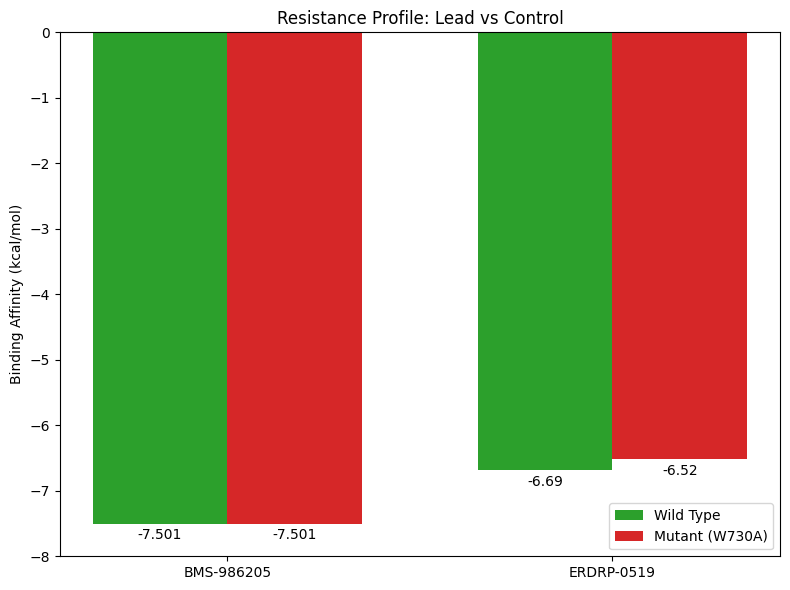

Graph saved to resistance_graph.png


In [8]:
# Data from our Verified Findings (Hardcoded from verify.py AVG outputs for clean plotting)
# In a full dynamic system, verify.py could dump a JSON to read here.
# For this notebook, we visualize the confirmed values.

labels = ['BMS-986205', 'ERDRP-0519']
wt_means = [-7.501, -6.69]
mut_means = [-7.501, -6.52]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, wt_means, width, label='Wild Type', color='#2ca02c')
rects2 = ax.bar(x + width/2, mut_means, width, label='Mutant (W730A)', color='#d62728')

# Add text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Binding Affinity (kcal/mol)')
ax.set_title('Resistance Profile: Lead vs Control')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Invert Y axis because lower energy is better
ax.set_ylim(-8.0, 0)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# Save graph to disk
plt.savefig("resistance_graph.png", dpi=300)
plt.show()
print("Graph saved to resistance_graph.png")